# MARKET SEGMENTATION OF CREDIT CARD CUSTOMERS

Author: Kevin Lee<br />Email: kvnlee97@gmail.com

### EXPLORING THE DATA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
cc_df = pd.read_csv('/Users/davidlee/Documents/Work/queens/data/CC GENERAL.csv')

In [3]:
cc_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
cc_df.info()
cc_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### CHECKING FOR MISSING DATA

In [5]:
cc_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
cc_df.loc[(cc_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = cc_df['MINIMUM_PAYMENTS'].mean()
cc_df.loc[(cc_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = cc_df['CREDIT_LIMIT'].mean()

In [7]:
cc_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
cc_df.drop('CUST_ID', axis= 1, inplace= True)

In [9]:
cc_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


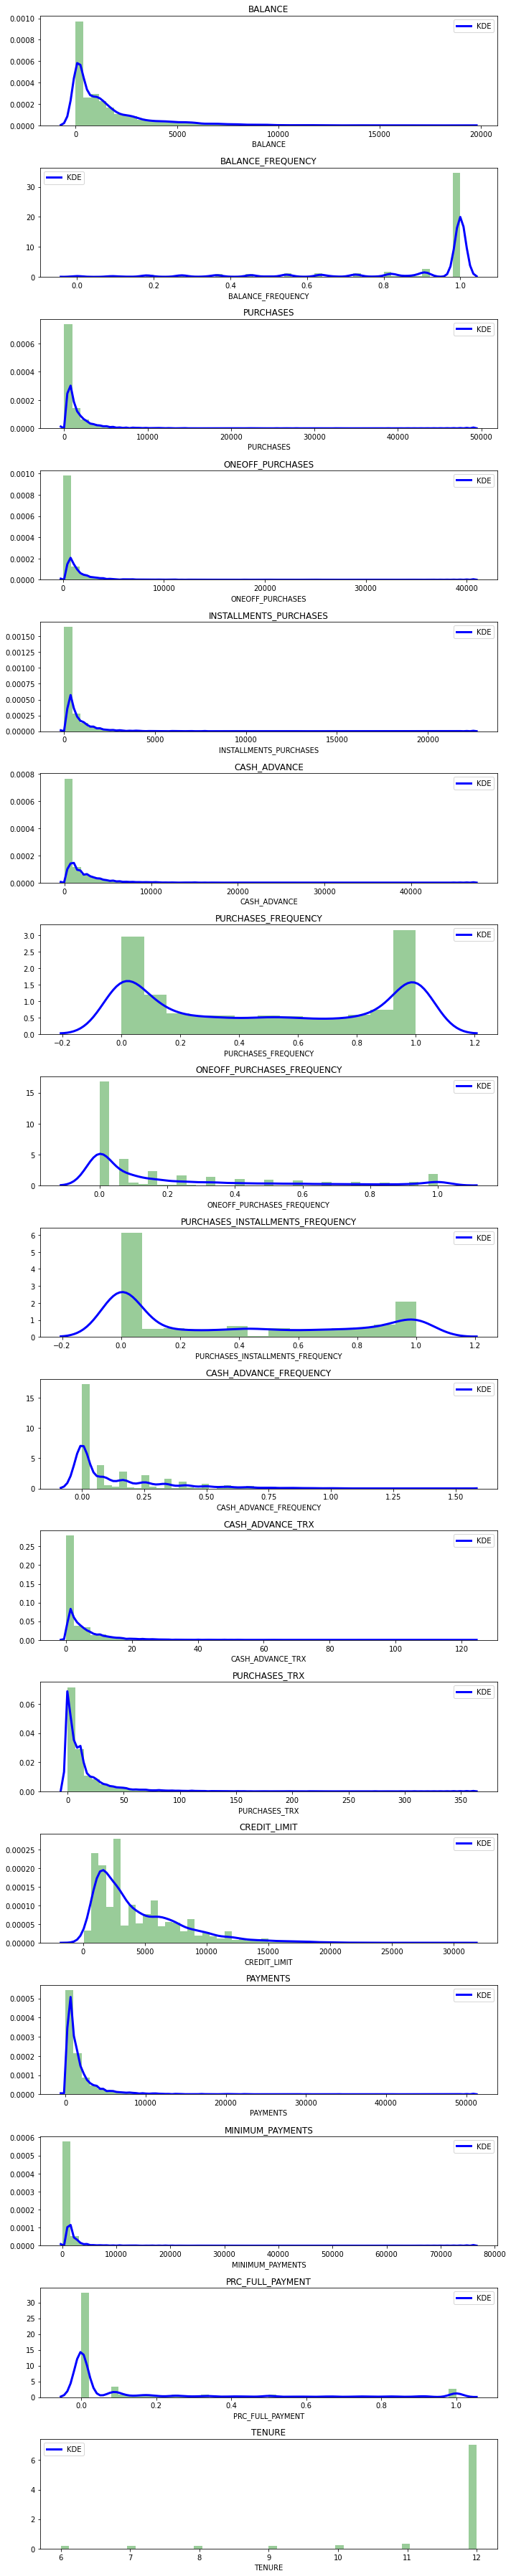

In [10]:
plt.figure(figsize= (10, 50))

for i in range(len(cc_df.columns)):
  plt.subplot(17, 1 , i+1)
  sns.distplot(cc_df[cc_df.columns[i]], kde_kws= {'color':'b', 'lw':3, 'label':'KDE'}, hist_kws= {'color':'g'})
  plt.title(cc_df.columns[i])

plt.tight_layout()

In [11]:
cc_corr = cc_df.corr()

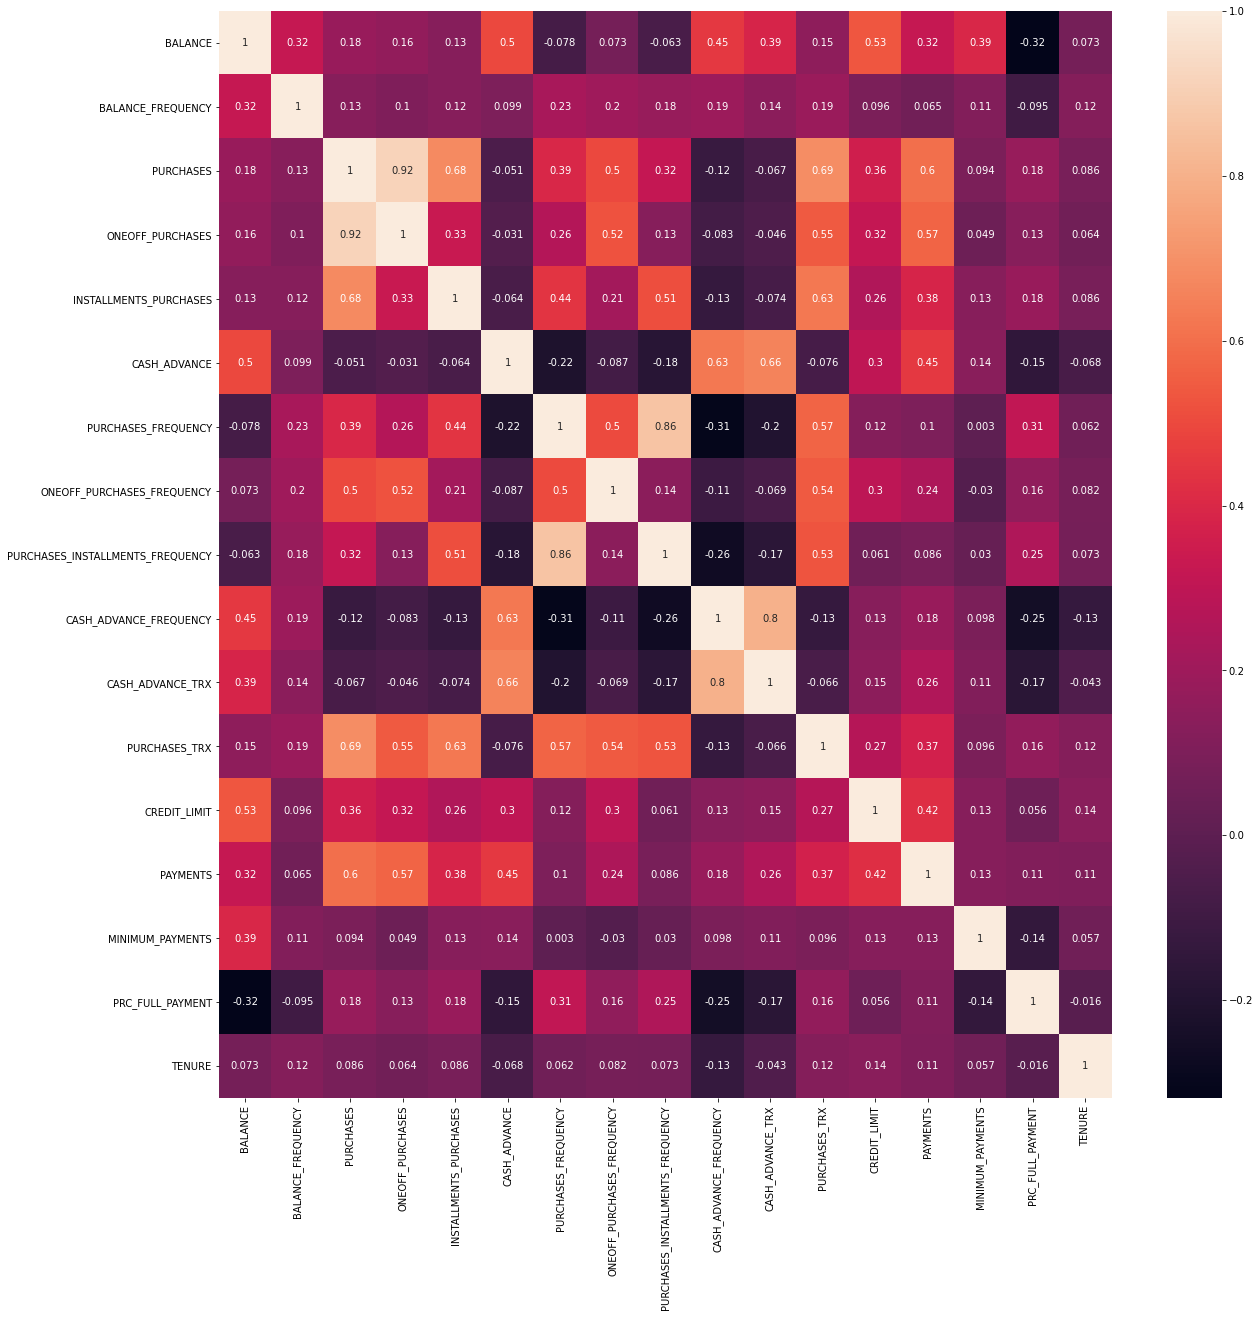

In [12]:
f, ax = plt.subplots(figsize= (20, 20))
sns.heatmap(cc_corr, annot= True)

### FINDING THE OPTIMAL NUMBER OF CLUSTERS

In [13]:
scaler = StandardScaler()

cc_df_scaled = scaler.fit_transform(cc_df)

In [14]:
score = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(cc_df_scaled)
  score.append(kmeans.inertia_)

<function matplotlib.pyplot.show(*args, **kw)>

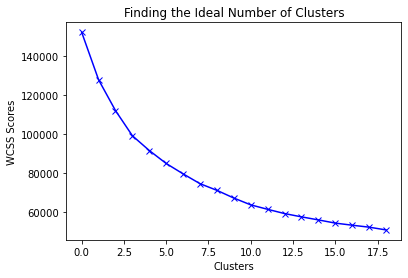

In [15]:
plt.plot(score, 'bx-')
plt.title('Finding the Ideal Number of Clusters')
plt.xlabel('Clusters')
plt.ylabel('WCSS Scores')
plt.show

### APPLYING K-MEANS CLUSTERING

In [16]:
kmeans = KMeans(8)
kmeans.fit(cc_df_scaled)
labels = kmeans.labels_
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns= [cc_df.columns])

In [17]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567159,-0.392680,-0.209145,0.014011,-3.203733
1,-0.701229,-2.144116,-0.311099,-0.235720,-0.302414,-0.321905,-0.556586,-0.444989,-0.439730,-0.520844,-0.376103,-0.419790,-0.177161,-0.202048,-0.256658,0.281550,0.199199
2,0.019164,0.403746,-0.361570,-0.246718,-0.401550,-0.090513,-0.866636,-0.409876,-0.758187,0.111712,-0.022832,-0.486558,-0.304471,-0.249431,-0.003716,-0.457071,0.272494
3,0.932292,0.467172,2.252464,1.708207,2.187676,-0.193361,1.160017,1.546775,1.256533,-0.310951,-0.209353,2.795546,1.232365,1.282830,0.574039,0.272222,0.333800
4,1.690481,0.391576,-0.218284,-0.156544,-0.228597,2.029267,-0.478632,-0.213098,-0.415543,1.925902,1.940330,-0.267148,1.031162,0.825654,0.512697,-0.390593,0.068883
5,-0.165383,0.392640,0.471321,0.615475,-0.016453,-0.332743,0.945591,1.882427,0.089915,-0.406696,-0.322771,0.532278,0.380906,0.098986,-0.162745,0.414965,0.262625
6,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
7,-0.366740,0.333338,-0.038539,-0.244303,0.357516,-0.363619,0.990253,-0.387060,1.205496,-0.475146,-0.361200,0.186769,-0.261316,-0.217940,-0.045979,0.314959,0.257484


In [18]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns= [cc_df.columns])

In [19]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2430.891398,596.373827,376.802926,0.157813,7.229904
1,104.925267,0.369349,338.537483,201.190254,137.598754,303.821813,0.266966,0.069709,0.189677,0.030918,0.682203,4.275424,3849.863936,1148.234177,266.075424,0.236063,11.783898
2,1604.363149,0.972914,230.705489,182.936298,47.951132,789.061401,0.142528,0.080184,0.063114,0.157499,3.093015,2.615809,3386.660539,1011.066726,855.547258,0.020029,11.881985
3,3504.962706,0.987939,5815.628058,3427.711343,2389.355564,573.383862,0.955921,0.663891,0.863816,0.072920,1.820144,84.196643,8978.297362,5446.809658,2201.980160,0.233335,11.964029
4,5083.068323,0.970031,536.838447,332.605956,204.350301,5234.339850,0.298252,0.138886,0.199290,0.520537,16.490151,8.069525,8246.239334,4123.330014,2059.024786,0.039473,11.609502
5,1220.244417,0.970284,2010.188851,1613.999041,396.189810,281.093992,0.869862,0.764022,0.400172,0.053760,1.046154,27.940271,5880.341423,2019.698208,484.936607,0.275085,11.868778
6,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
7,801.136827,0.956236,920.865753,186.944441,734.365067,216.346127,0.887787,0.086990,0.843532,0.040063,0.783905,19.352211,3543.676206,1102.229857,757.053521,0.245835,11.861898


In [20]:
cc_df_cluster = pd.concat([cc_df, pd.DataFrame({'cluster':labels})], axis = 1)

cc_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


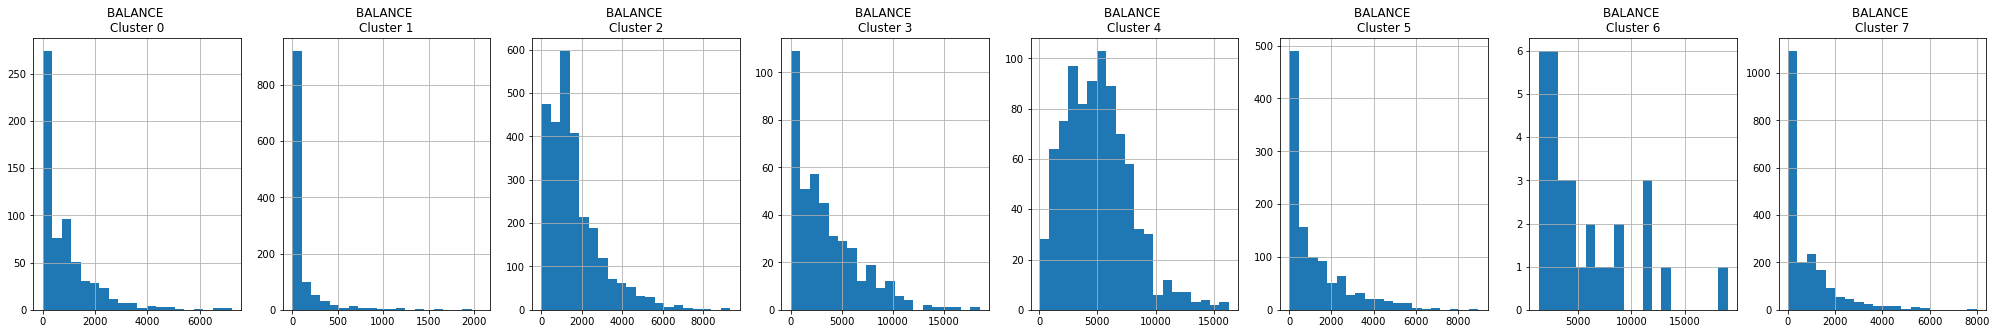

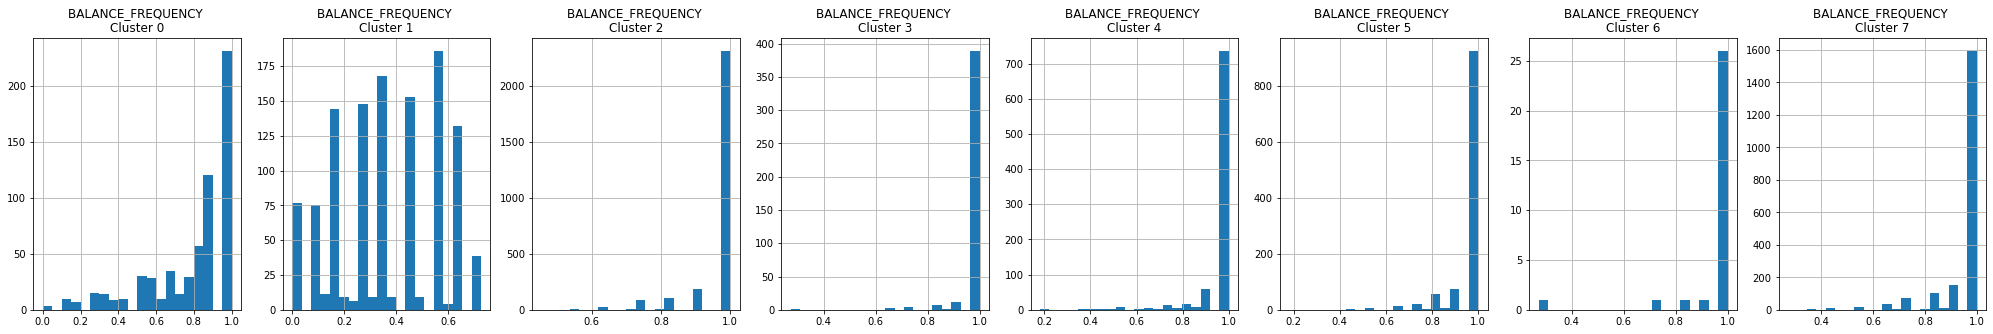

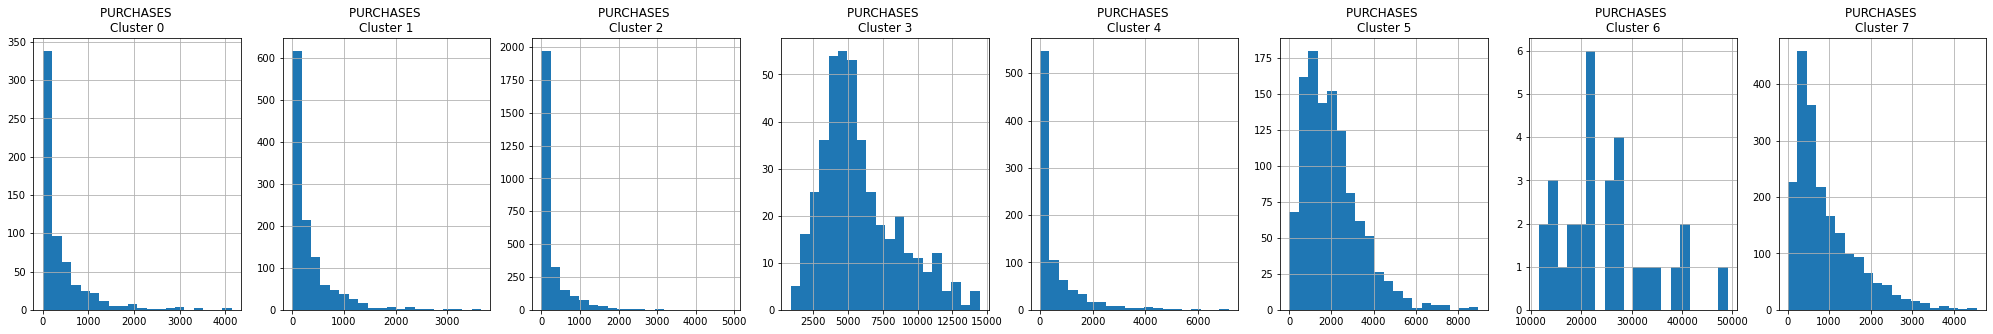

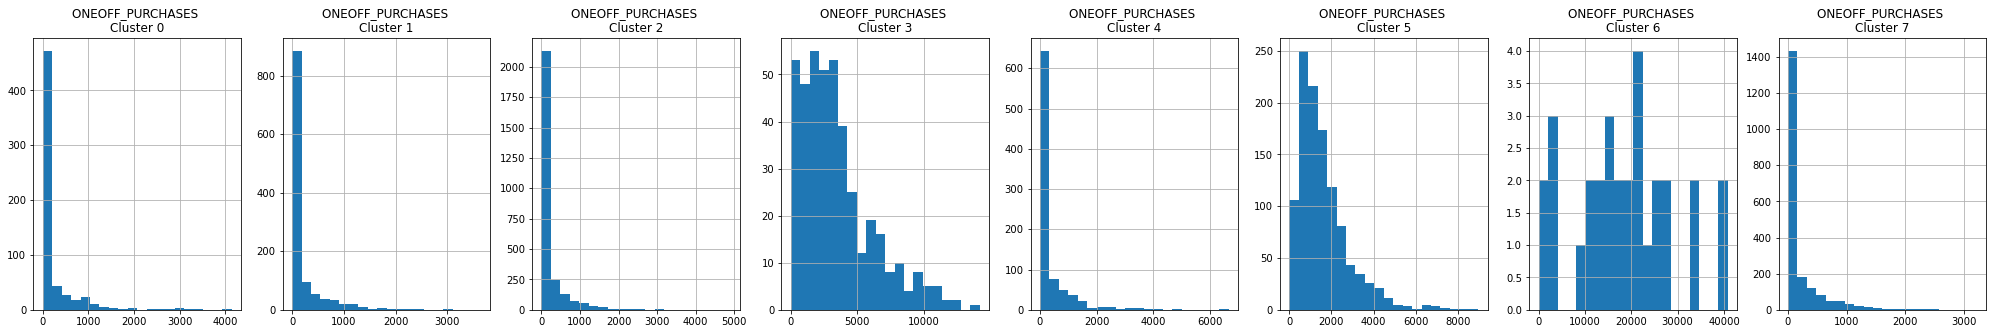

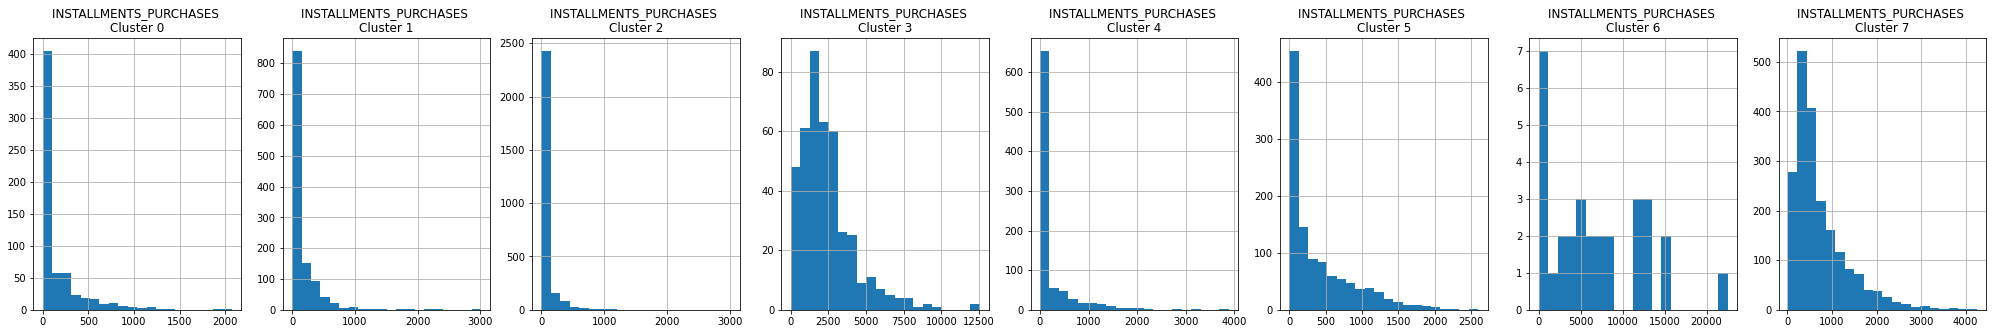

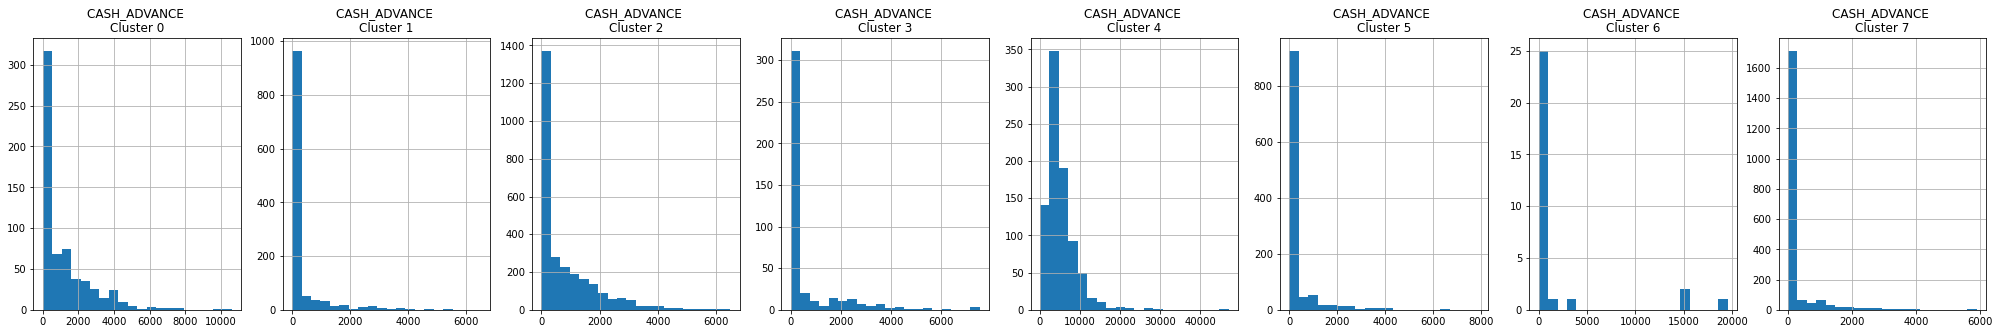

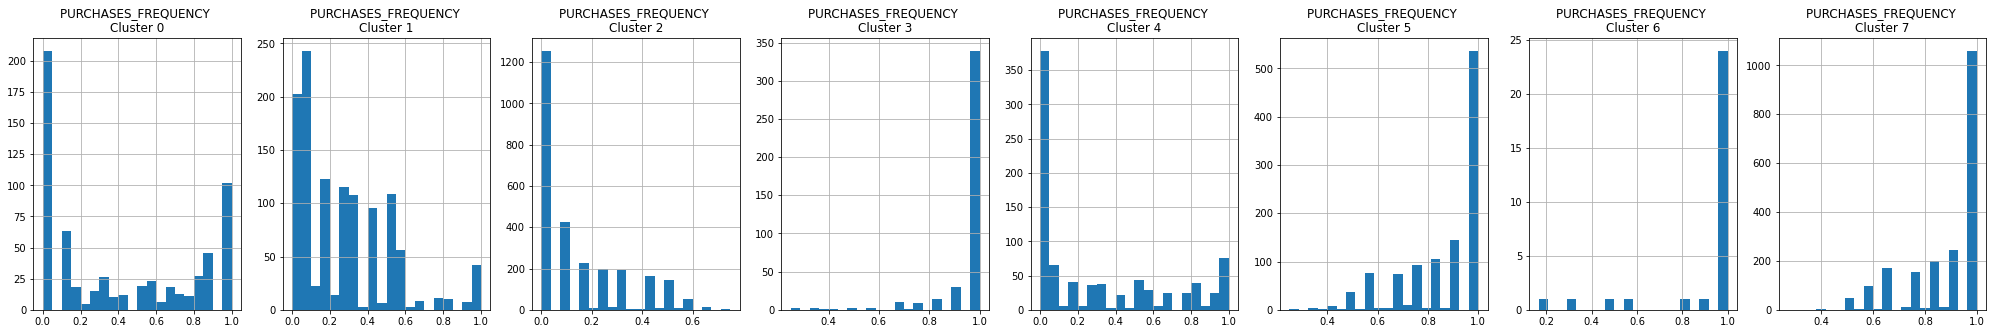

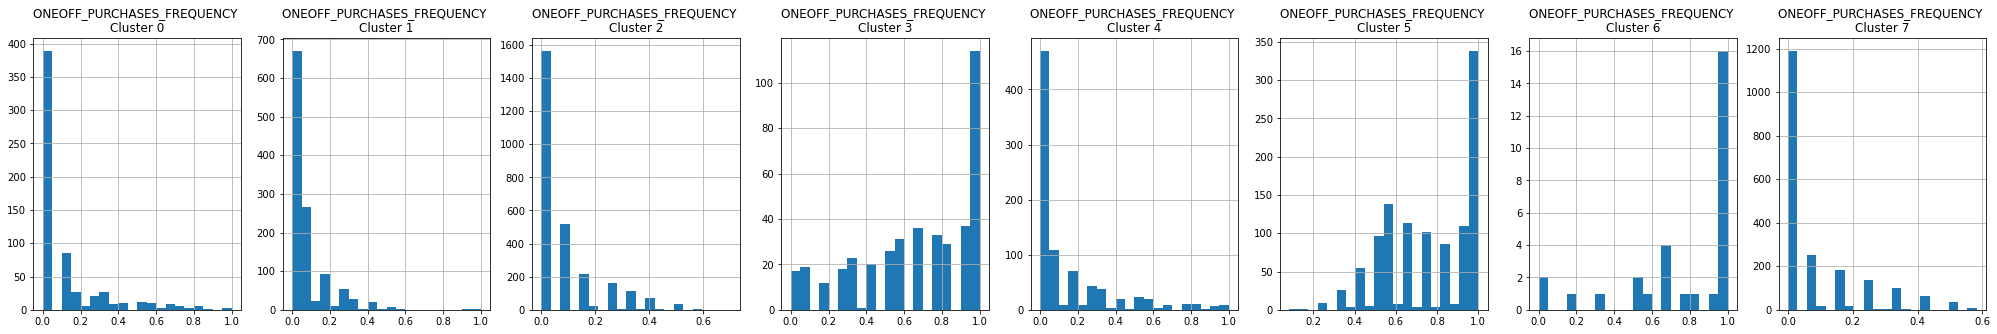

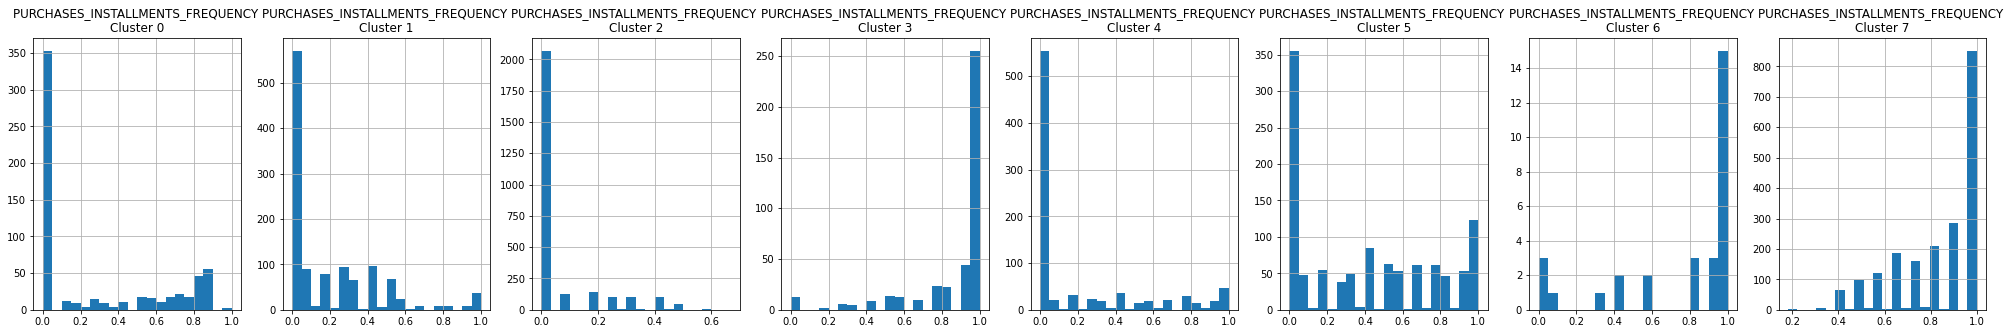

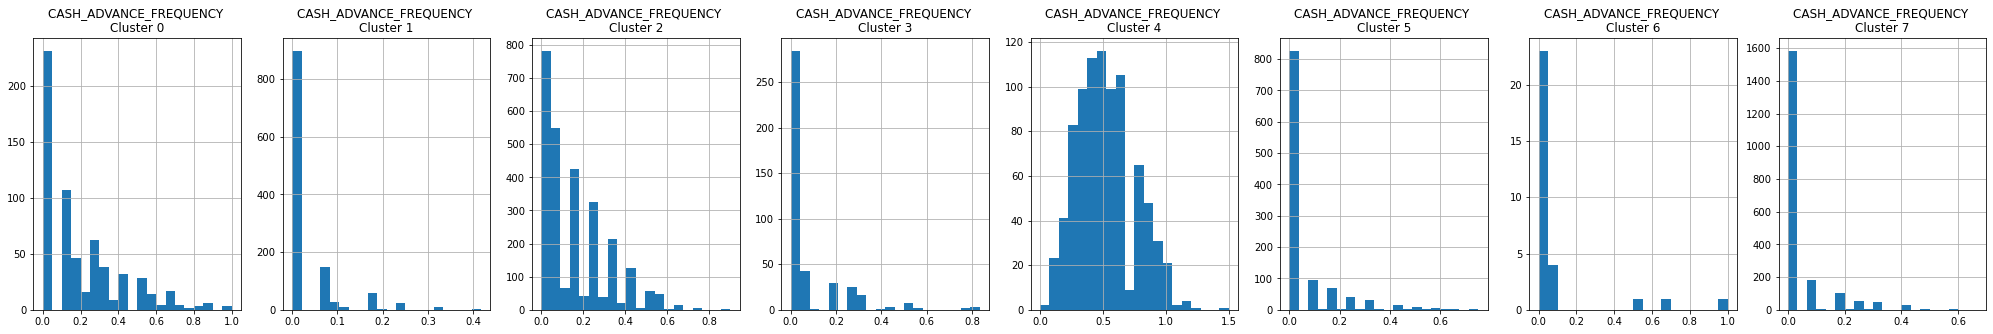

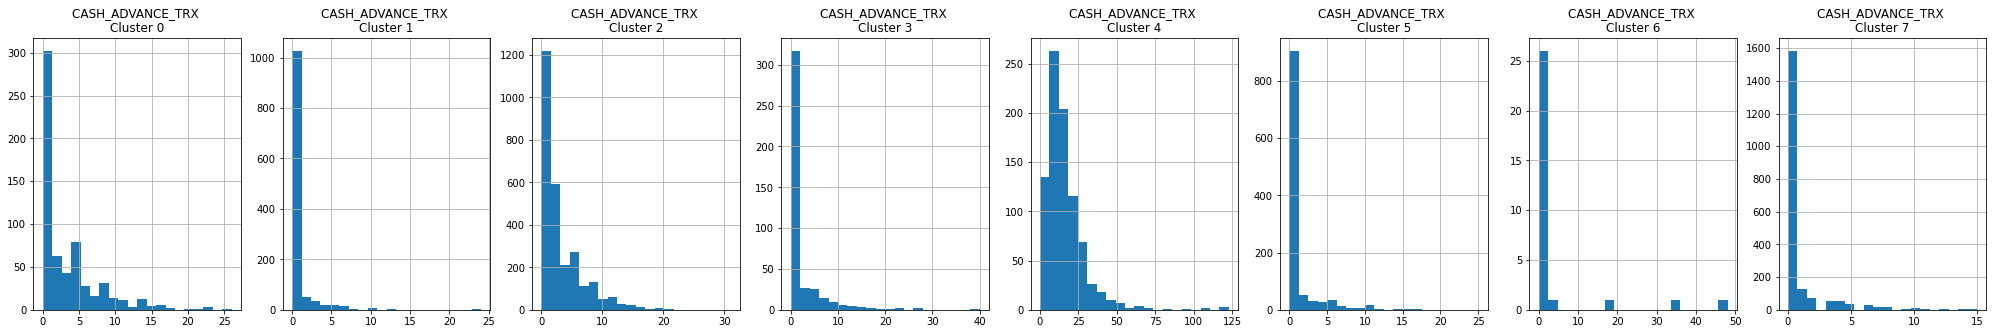

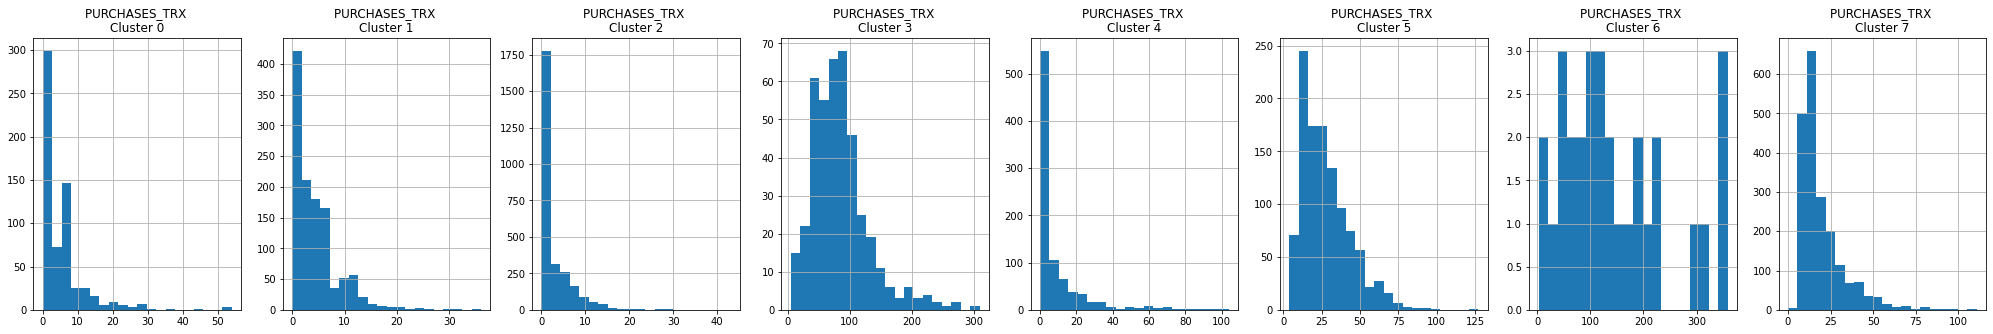

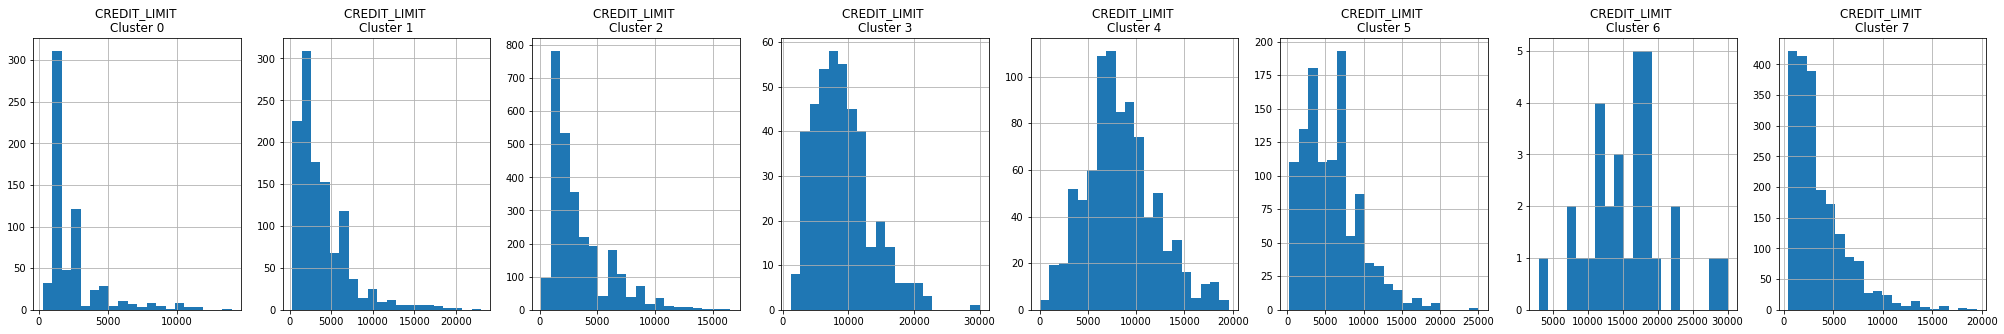

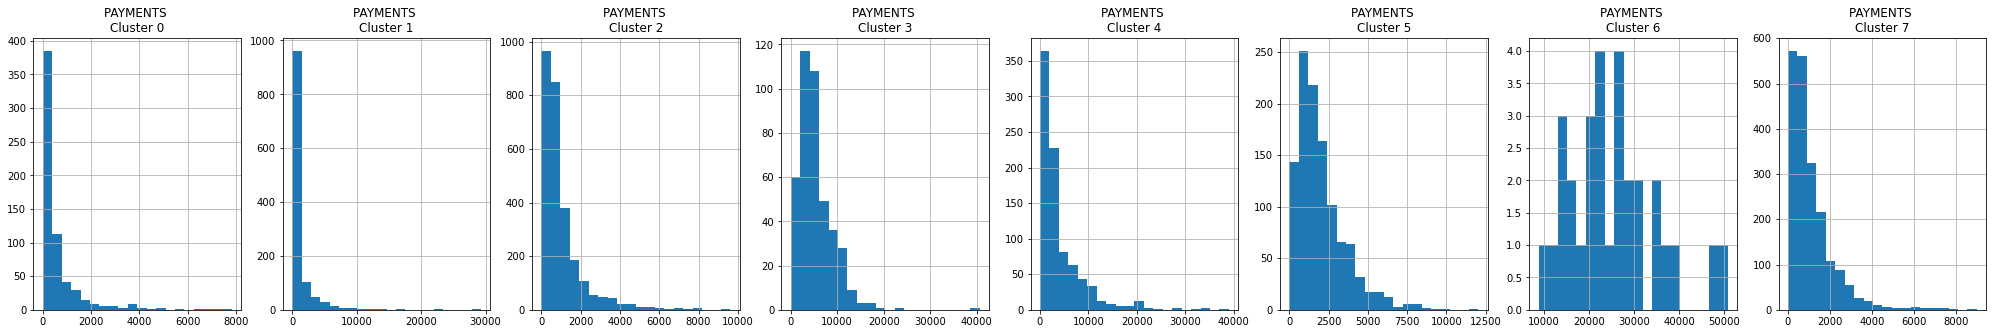

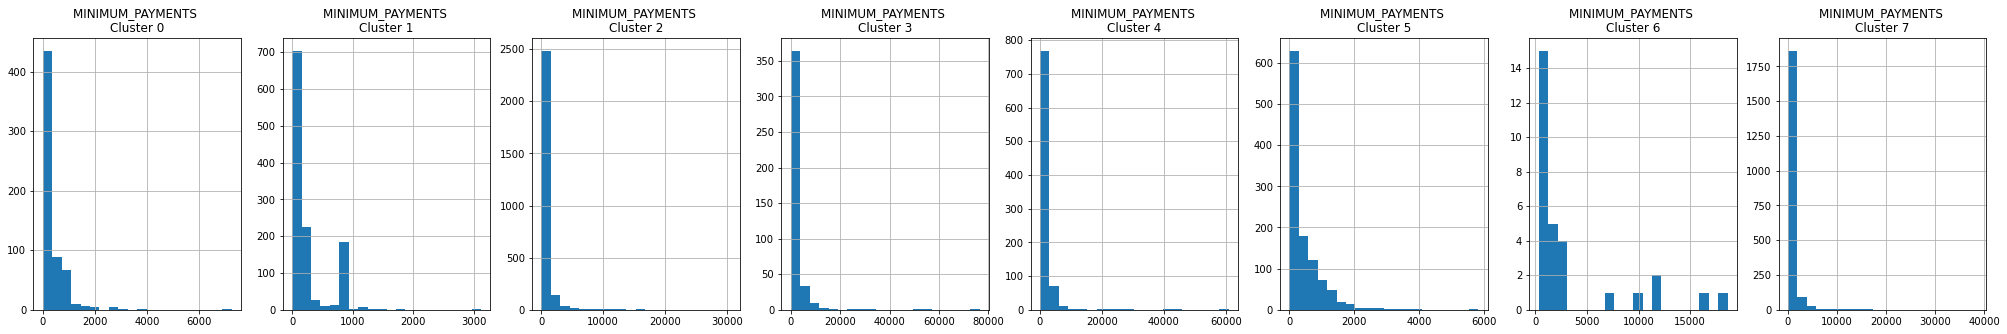

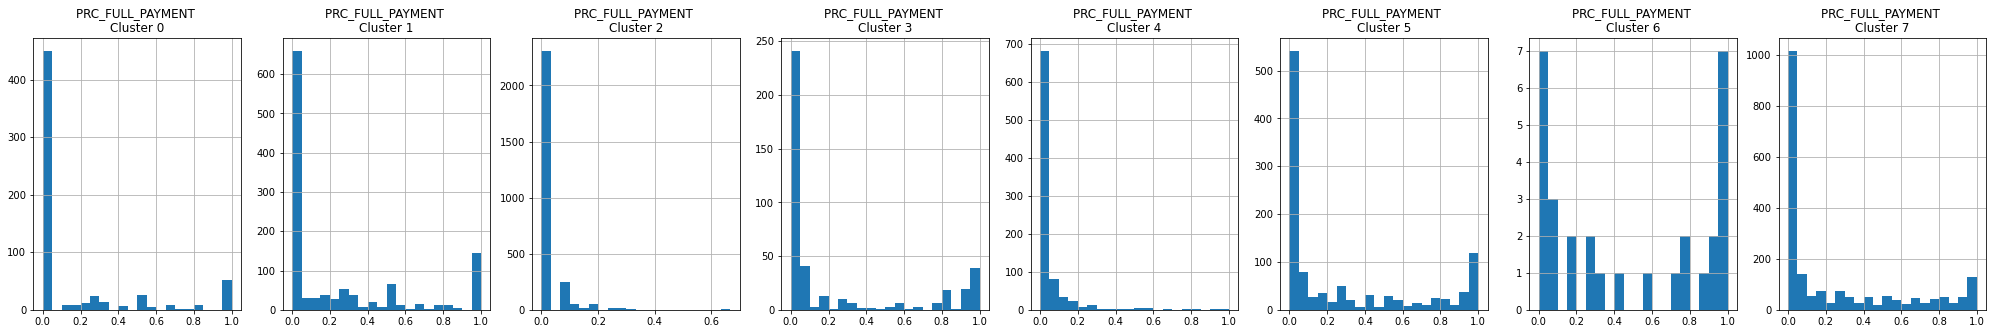

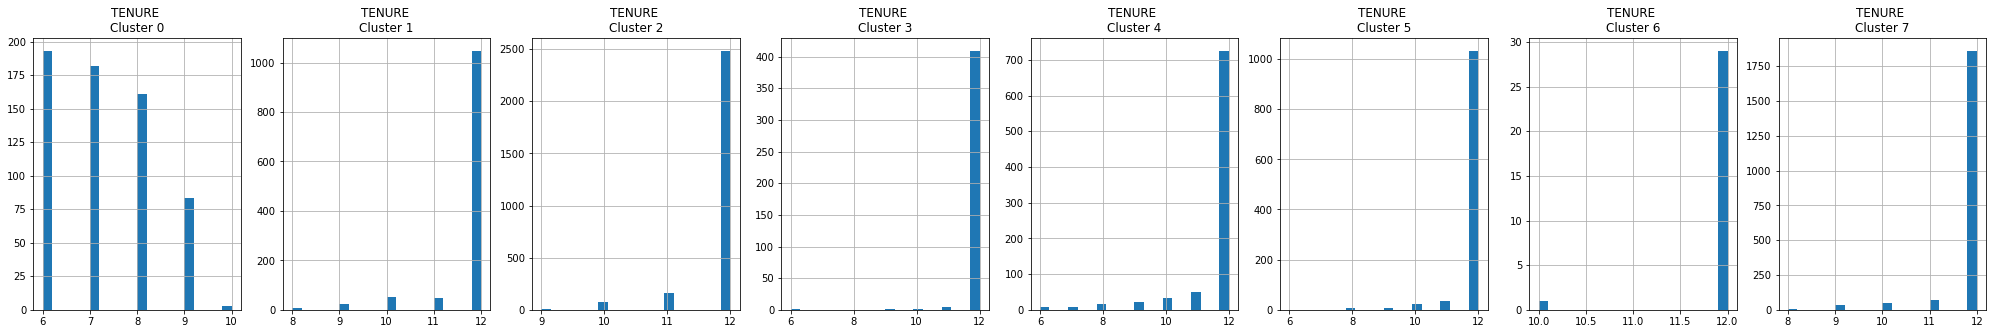

In [21]:
for i in cc_df.columns:
  plt.figure(figsize= (35, 5))
  for j in range(8):
    plt.subplot(1, 8, j+1)
    cluster = cc_df_cluster[cc_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))

plt.show()

### APPLYING PRINCIPAL COMPONENT ANALYSIS

In [22]:
pca = PCA(n_components= 2)
pca_applied = pca.fit_transform(cc_df_scaled)

In [23]:
pca_df = pd.DataFrame(data = pca_applied, columns= ['PCA1', 'PCA2'])
pca_df.head()

,PCA1,PCA2
0,-1.682220,-1.076448
1,-1.138295,2.506466
2,0.969681,-0.383544
3,-0.873627,0.043166
4,-1.599434,-0.688577


In [24]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis= 1)
pca_df.head()

,PCA1,PCA2,cluster
0,-1.682220,-1.076448,2
1,-1.138295,2.506466,4
2,0.969681,-0.383544,5
3,-0.873627,0.043166,2
4,-1.599434,-0.688577,2


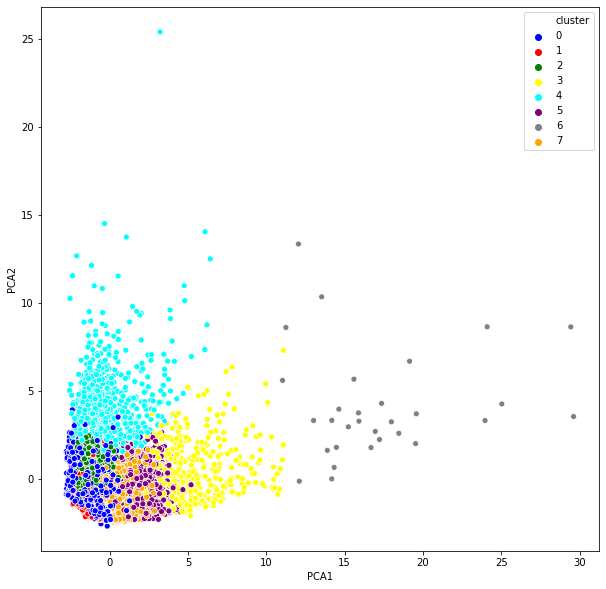

In [25]:
plt.figure(figsize= (10, 10))
ax.set_title('PCA', fontsize = 20)
ax = sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'cluster', data = pca_df, palette= ['blue', 'red', 'green', 'yellow', 'cyan', 'purple', 'grey', 'orange'])

In [26]:
pca.explained_variance_ratio_

array([0.27290037, 0.20301991])

In [27]:
pca.explained_variance_ratio_.sum()

0.4759202854881498

### USING MEDIAN VS. MEAN

In [28]:
cc_df2 = pd.read_csv('/Users/davidlee/Documents/Work/queens/data/CC GENERAL.csv')

In [29]:
cc_df2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [30]:
cc_df2.loc[(cc_df2['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = cc_df2['MINIMUM_PAYMENTS'].median()
cc_df2.loc[(cc_df2['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = cc_df2['CREDIT_LIMIT'].median()

In [31]:
cc_df2.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [32]:
cc_df2.drop('CUST_ID', axis= 1, inplace= True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


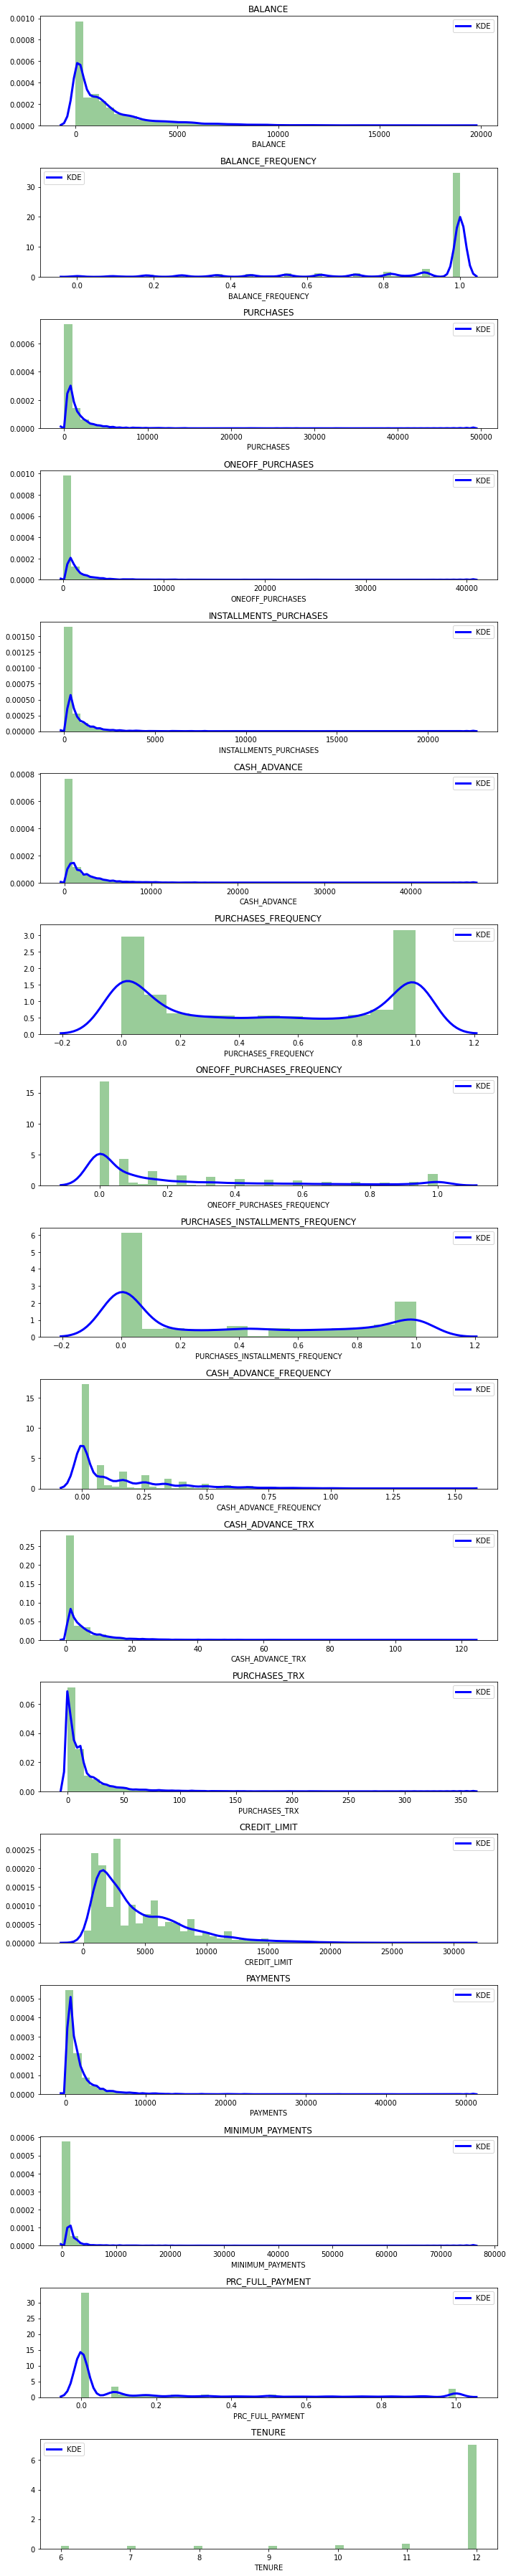

In [33]:
plt.figure(figsize= (10, 50))

for i in range(len(cc_df2.columns)):
  plt.subplot(17, 1 , i+1)
  sns.distplot(cc_df2[cc_df2.columns[i]], kde_kws= {'color':'b', 'lw':3, 'label':'KDE'}, hist_kws= {'color':'g'})
  plt.title(cc_df2.columns[i])

plt.tight_layout()

In [34]:
cc_corr2 = cc_df2.corr()

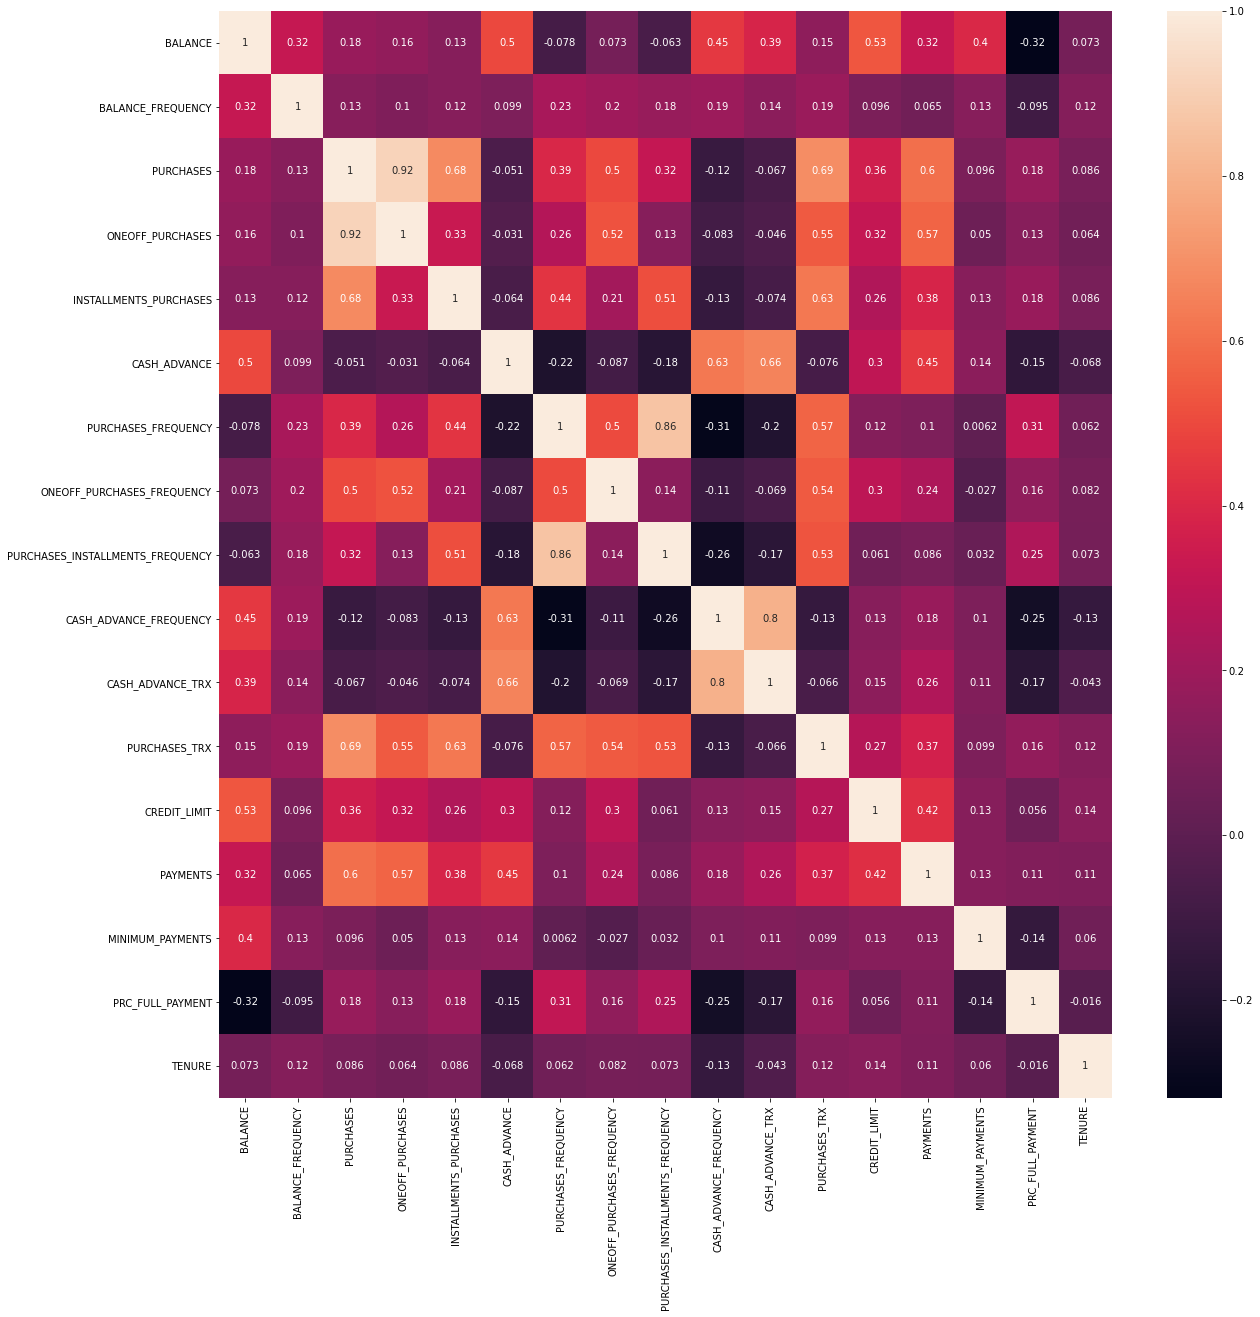

In [35]:
f, ax = plt.subplots(figsize= (20, 20))
sns.heatmap(cc_corr2, annot= True)

In [36]:
cc_df_scaled2 = scaler.fit_transform(cc_df2)

In [37]:
score2 = []

for i in range_values:
  kmeans2 = KMeans(n_clusters= i)
  kmeans2.fit(cc_df_scaled2)
  score2.append(kmeans2.inertia_)

<function matplotlib.pyplot.show(*args, **kw)>

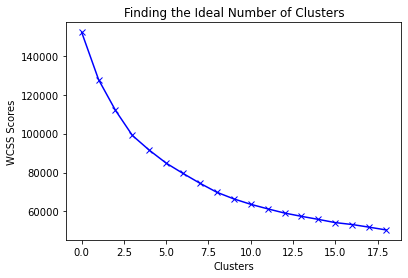

In [38]:
plt.plot(score2, 'bx-')
plt.title('Finding the Ideal Number of Clusters')
plt.xlabel('Clusters')
plt.ylabel('WCSS Scores')
plt.show

In [39]:
kmeans2 = KMeans(8)
kmeans2.fit(cc_df_scaled2)
labels = kmeans2.labels_
cluster_centers2 = pd.DataFrame(data = kmeans2.cluster_centers_, columns= [cc_df2.columns])

In [40]:
cluster_centers2 = scaler.inverse_transform(cluster_centers2)
cluster_centers2 = pd.DataFrame(data = cluster_centers2, columns= [cc_df2.columns])

In [41]:
cluster_centers2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,863.259693,0.793905,387.463654,236.537740,151.406683,1119.947453,0.408737,0.116973,0.274915,0.196480,3.246795,5.068910,2443.141026,595.176112,341.043263,0.157627,7.232372
1,1287.576021,0.972170,2163.929465,1708.815606,455.113859,284.247254,0.884271,0.771294,0.433704,0.052523,0.997326,30.194296,6074.534111,2157.774800,488.546990,0.283619,11.877005
2,104.867851,0.370990,340.737061,202.743395,138.244341,302.015981,0.268361,0.070772,0.190035,0.030708,0.679054,4.306588,3853.327233,1147.983995,180.701427,0.237837,11.787162
3,1589.702284,0.972985,240.596961,191.342473,49.434183,781.059210,0.148204,0.084789,0.064693,0.155736,3.054829,2.741467,3389.857177,1010.956202,825.918581,0.020515,11.883079
4,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
5,817.082163,0.956357,930.805057,191.050684,740.196810,217.933499,0.889326,0.088424,0.843719,0.040527,0.792967,19.491828,3552.635068,1112.073496,791.018906,0.244433,11.860327
6,5074.010044,0.970375,539.143482,334.629072,204.630871,5191.855751,0.301422,0.140419,0.201051,0.518063,16.350515,8.107675,8239.753202,4103.940565,2146.895448,0.039617,11.612829
7,3737.616647,0.987283,6412.797493,3642.184387,2772.322507,682.876054,0.957360,0.671355,0.869231,0.079034,2.276353,92.826211,9260.968661,6009.414573,2177.111576,0.231116,11.968661


In [42]:
cc_df_cluster2 = pd.concat([cc_df2, pd.DataFrame({'cluster':labels})], axis = 1)

cc_df_cluster2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


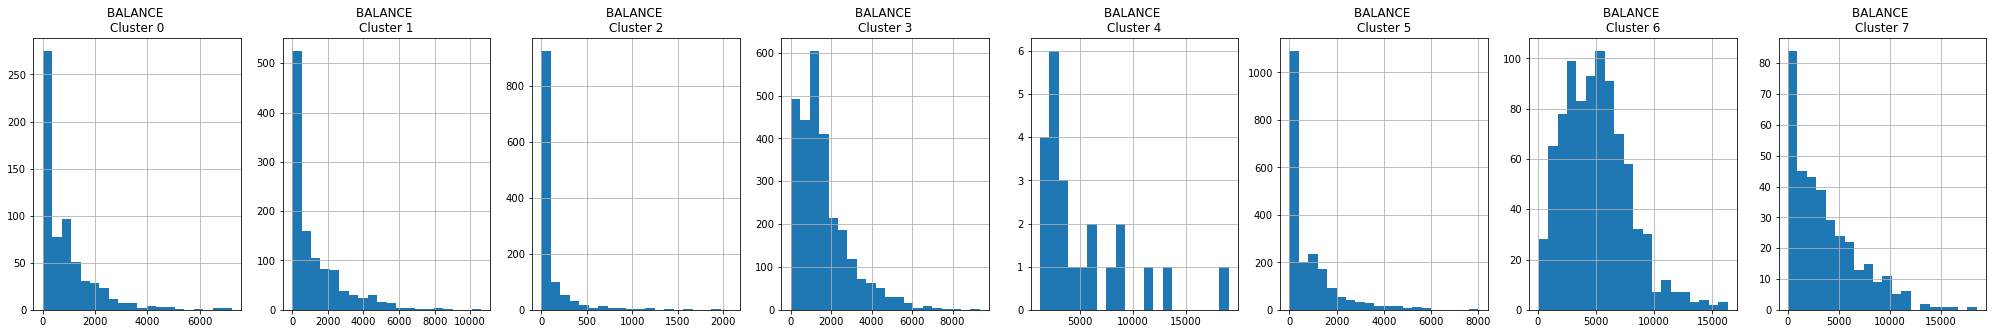

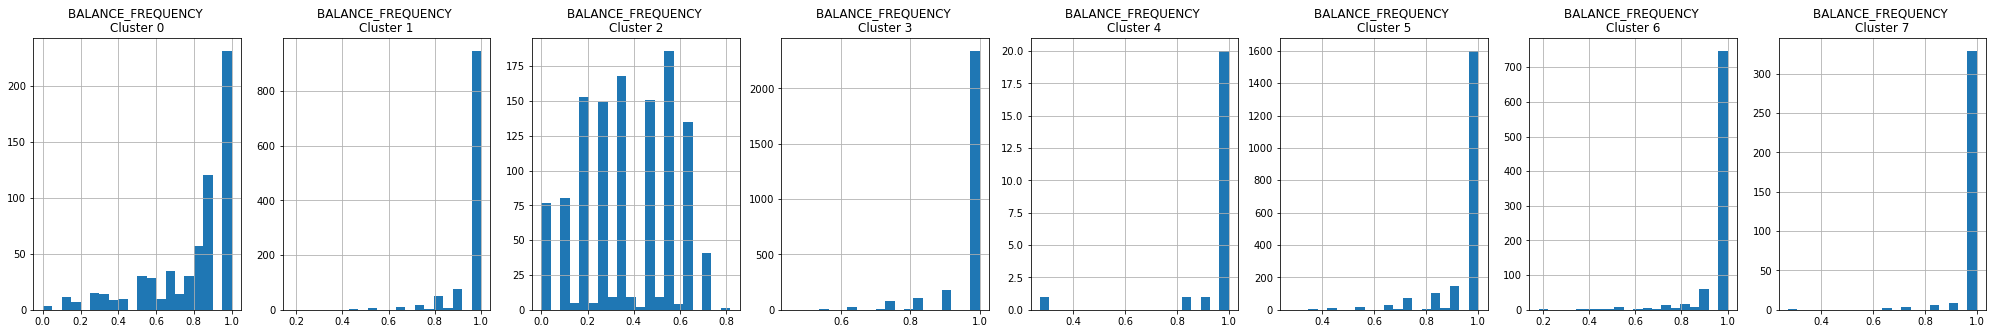

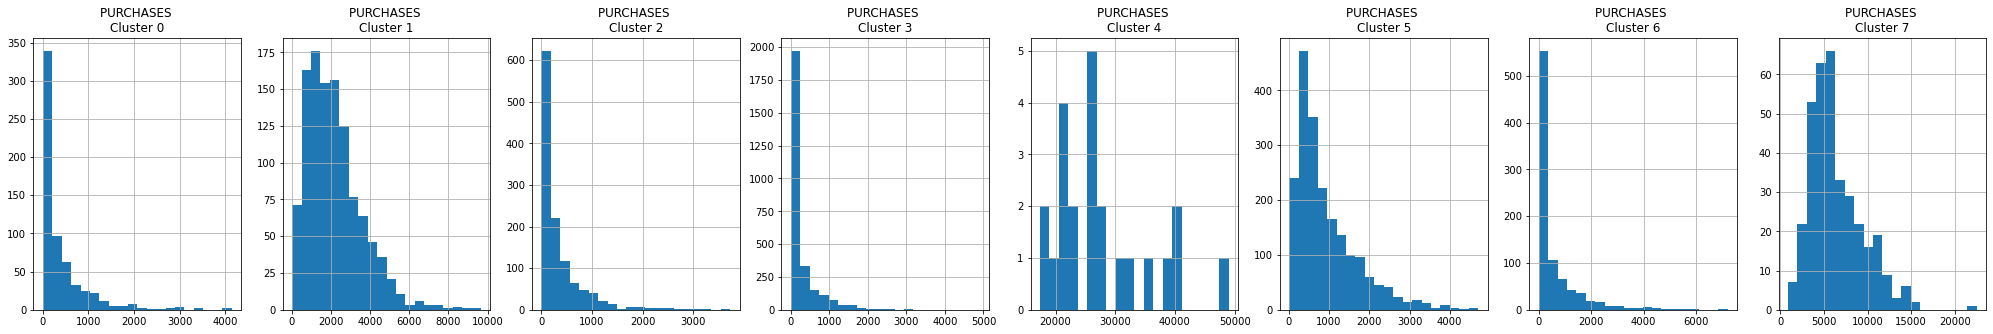

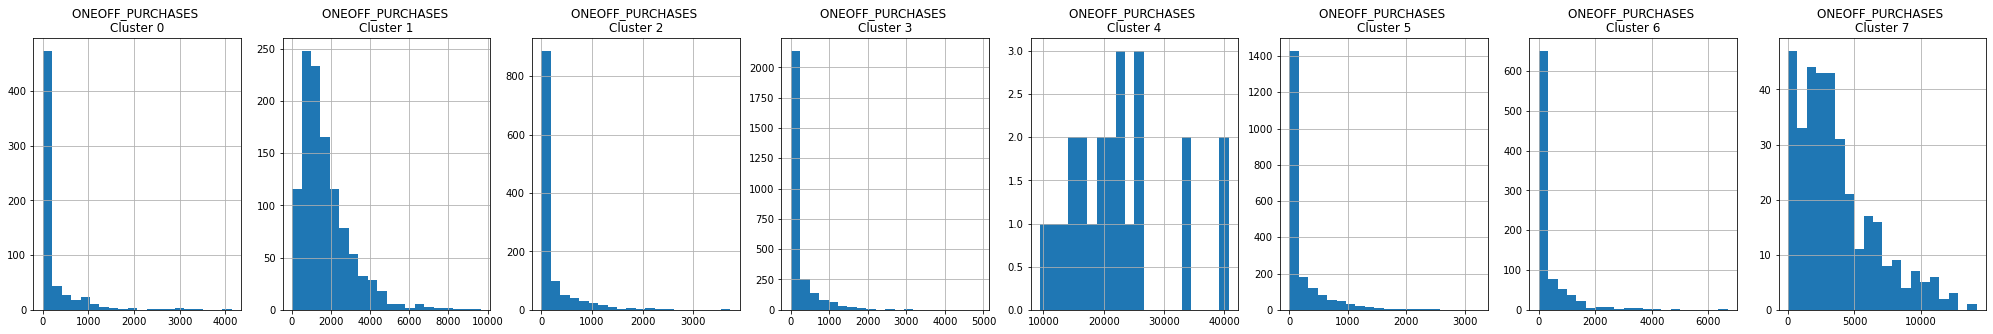

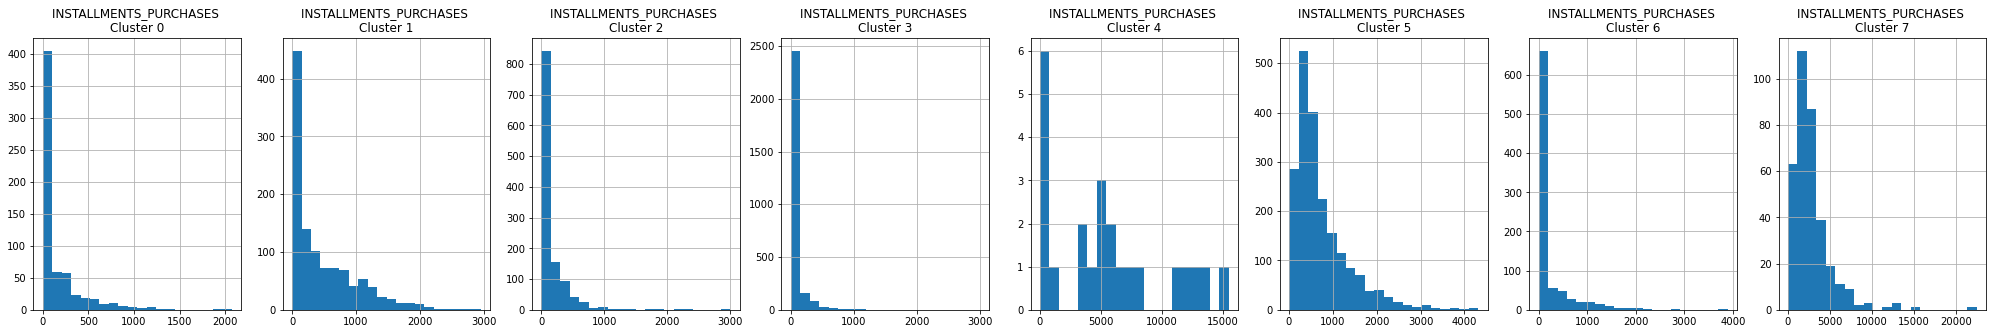

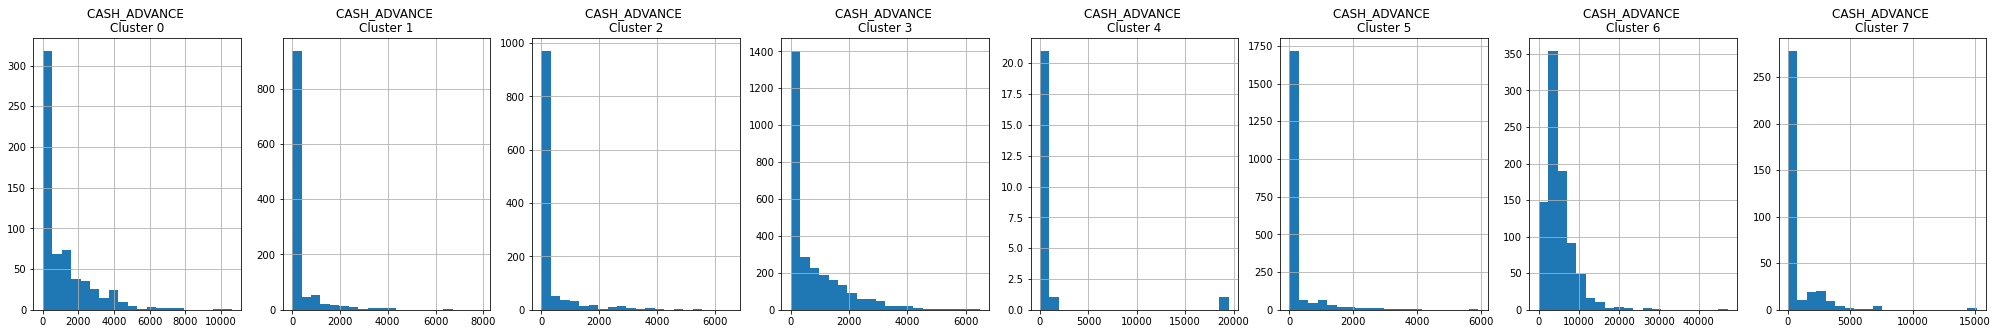

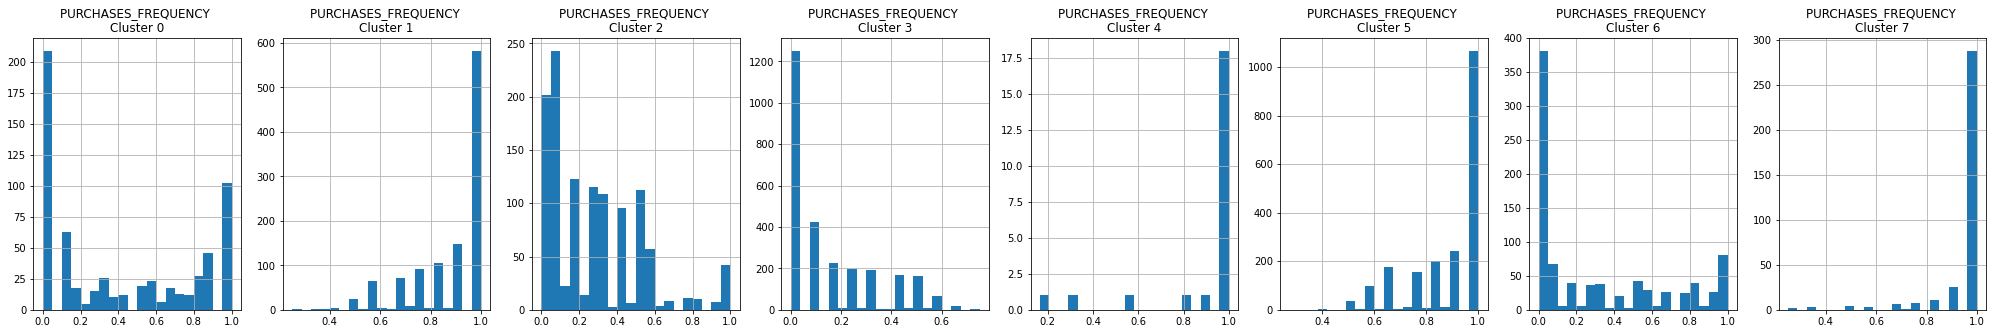

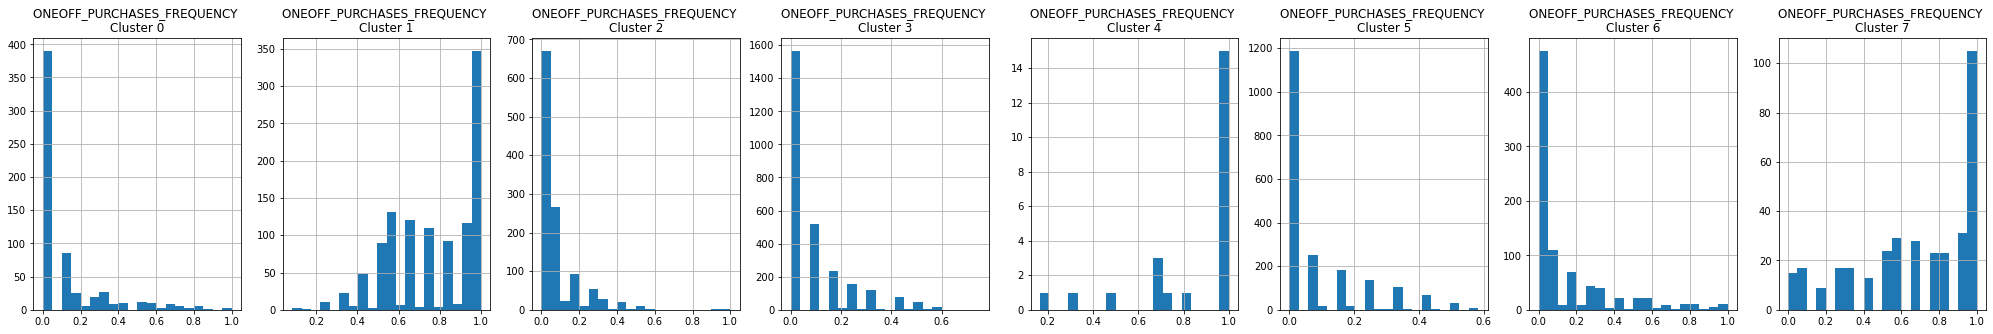

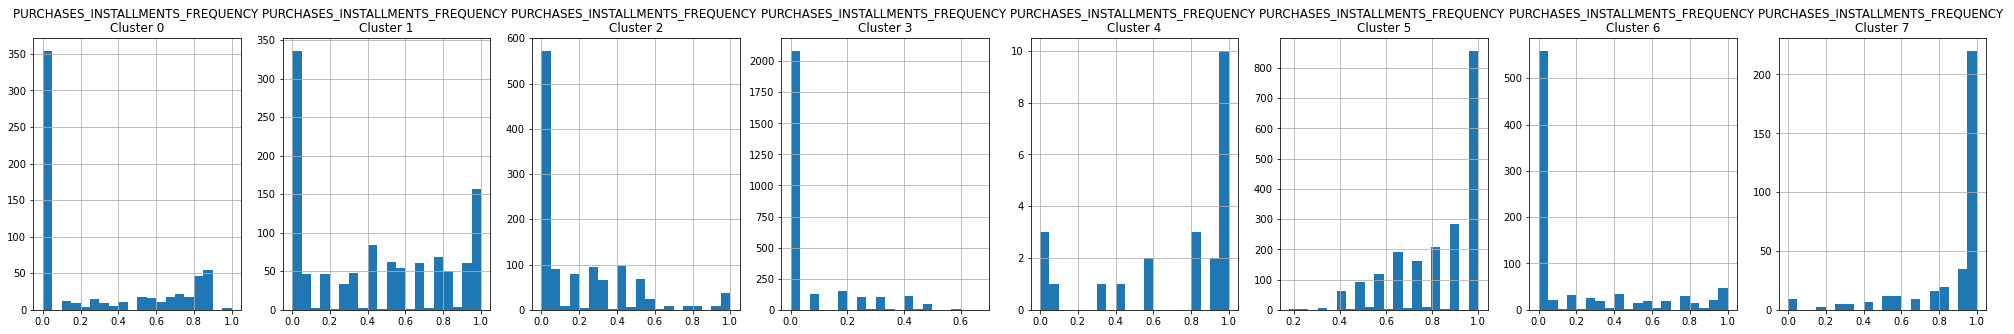

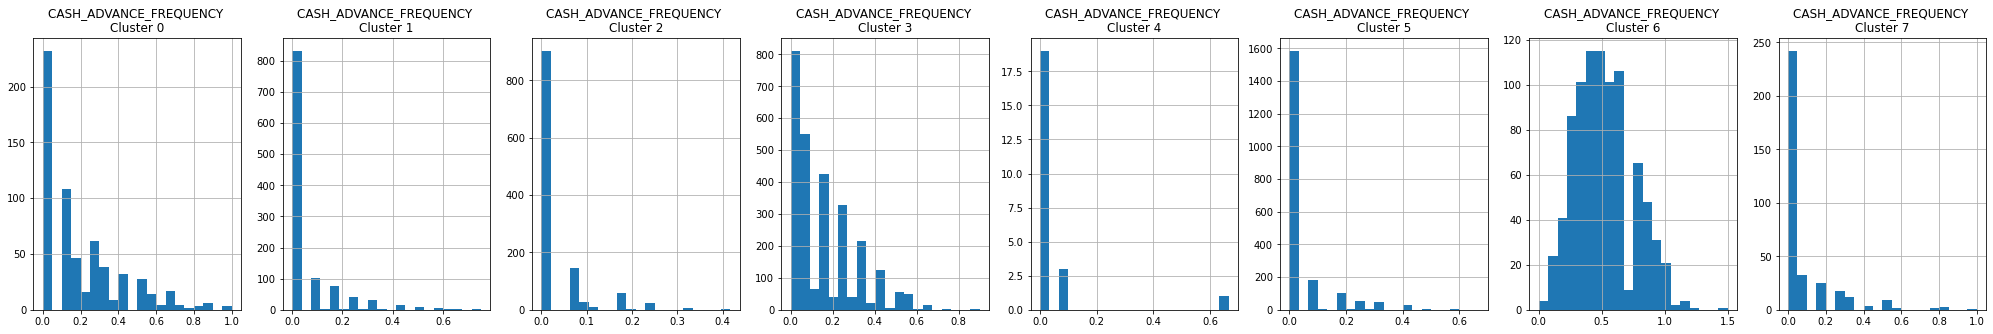

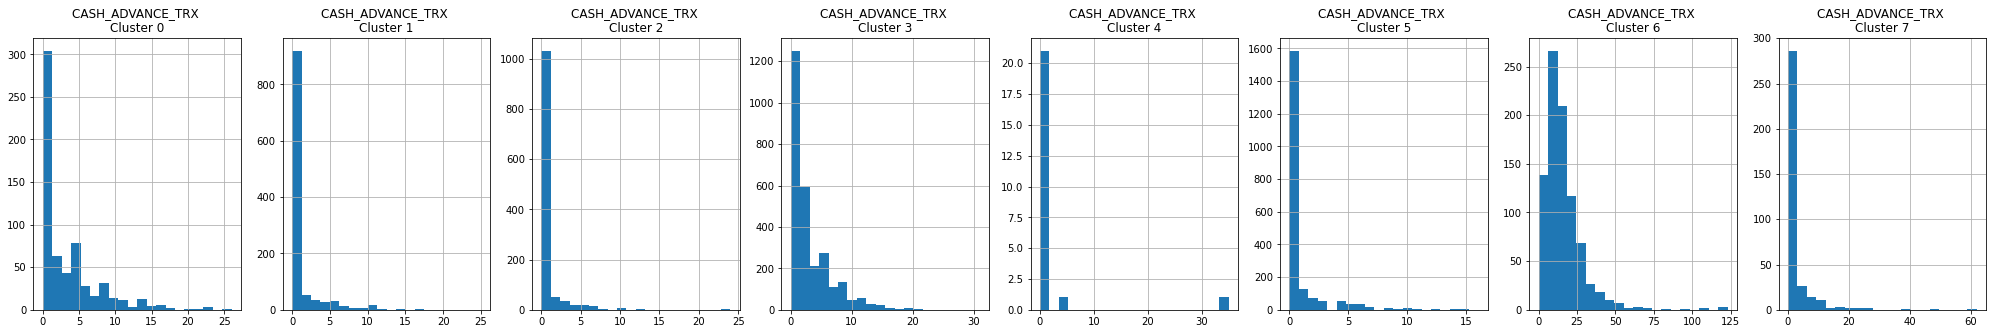

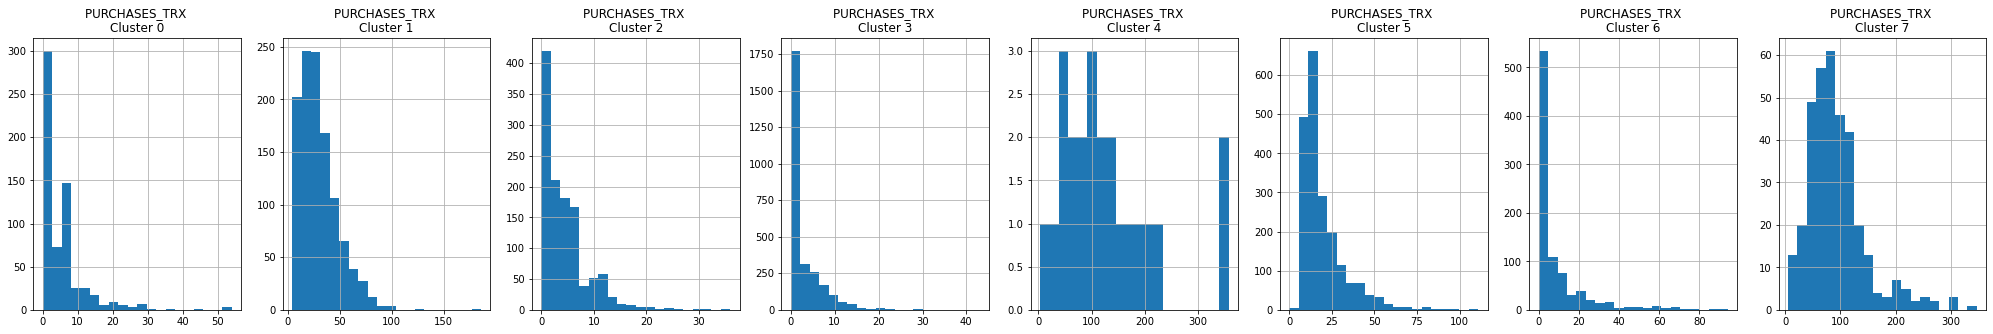

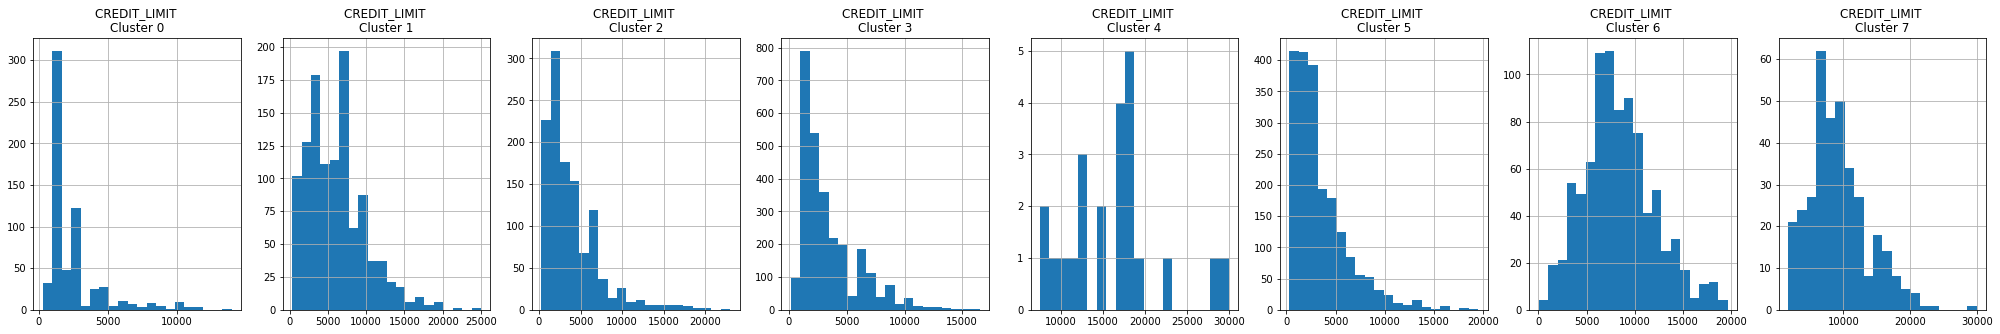

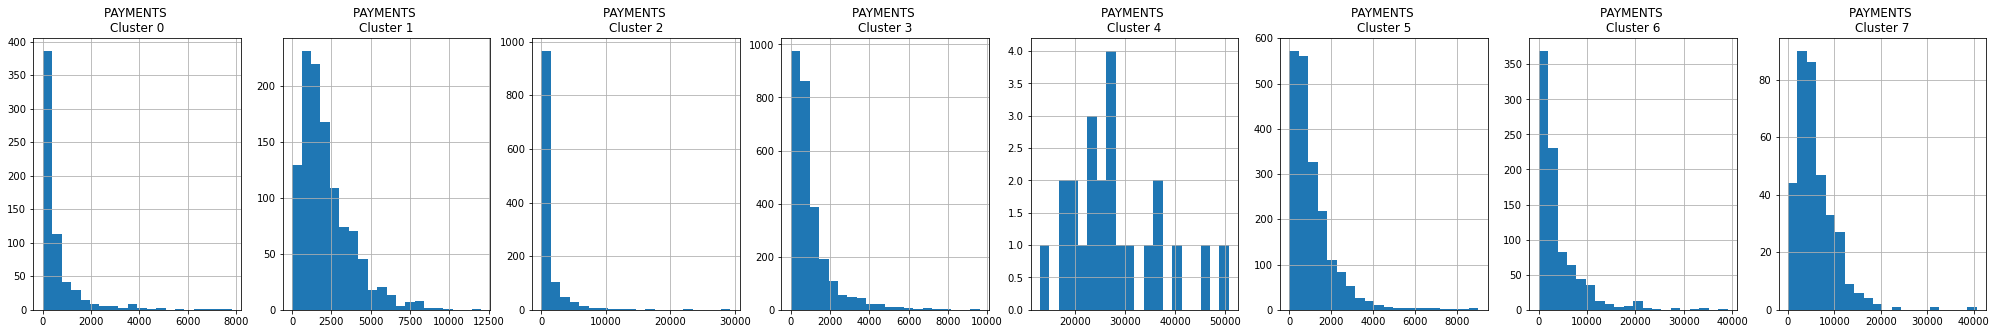

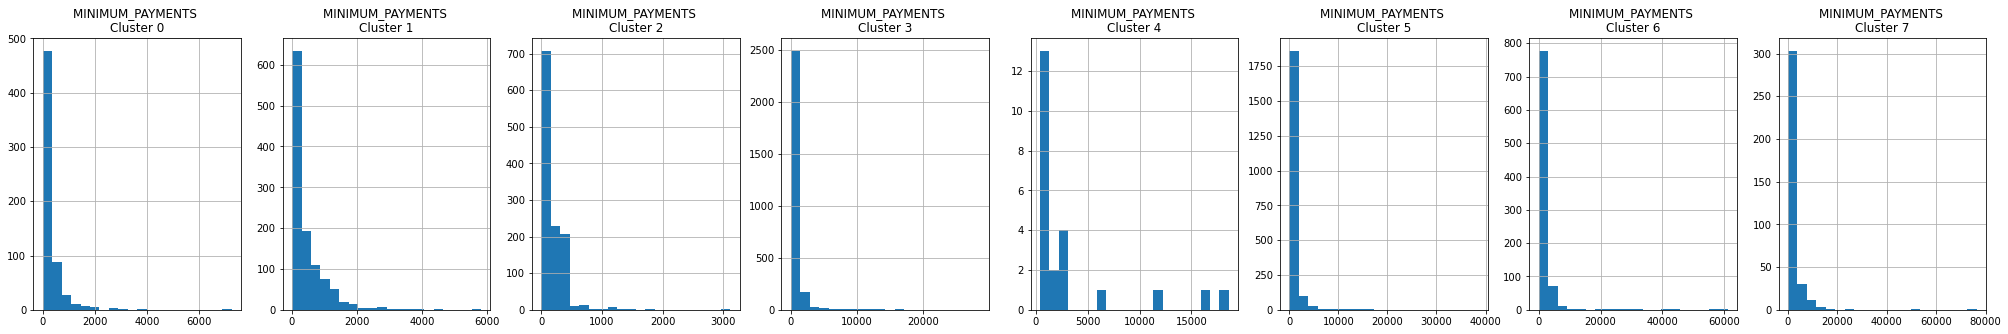

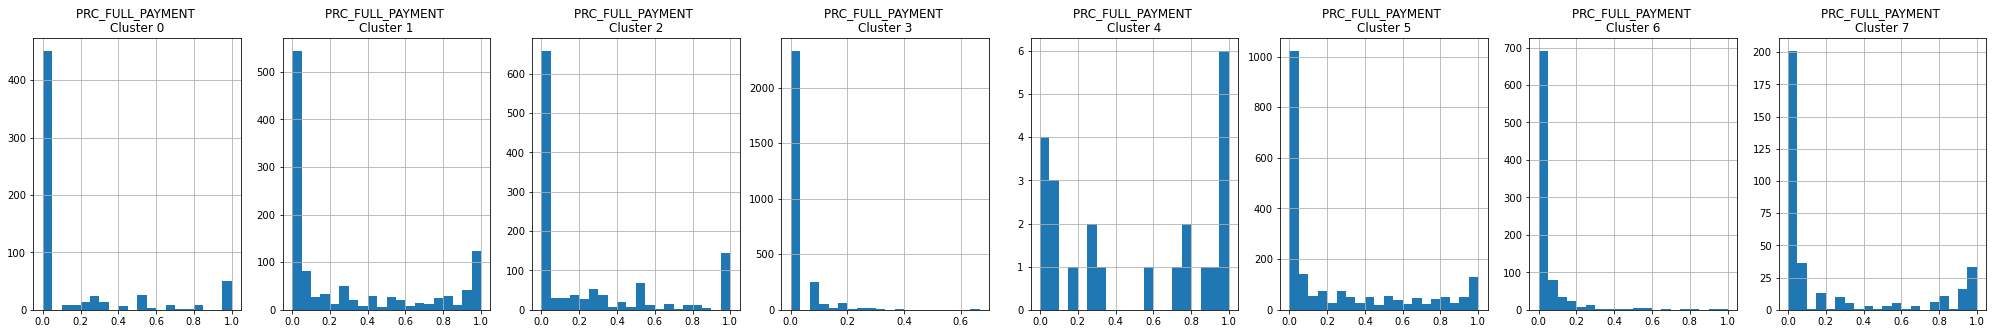

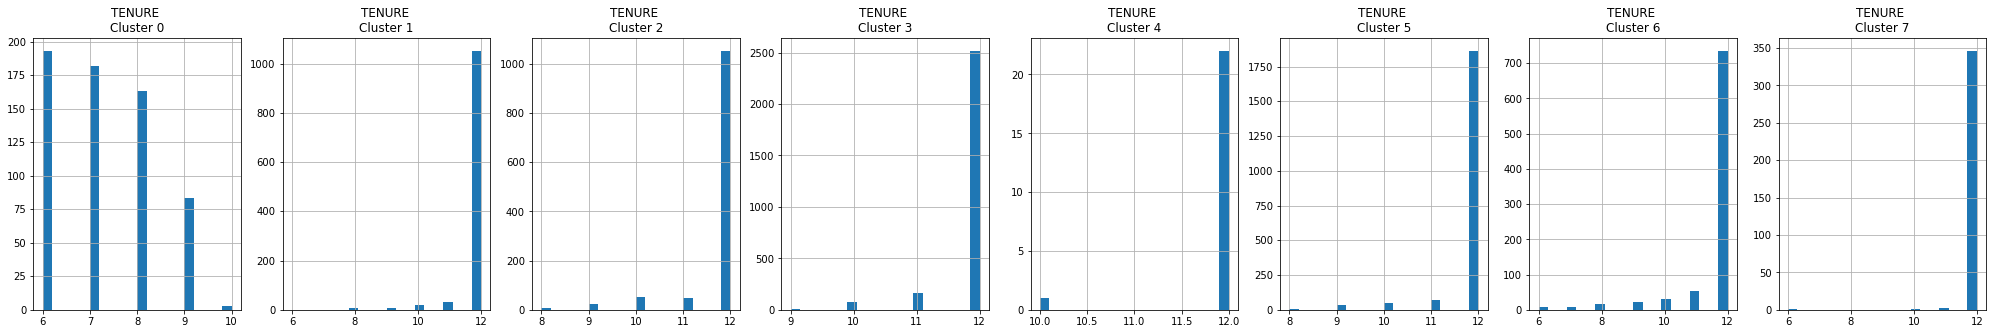

In [43]:
for i in cc_df2.columns:
  plt.figure(figsize= (35, 5))
  for j in range(8):
    plt.subplot(1, 8, j+1)
    cluster = cc_df_cluster2[cc_df_cluster2['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))

plt.show()

In [44]:
pca_applied2 = pca.fit_transform(cc_df_scaled2)

In [45]:
pca_df2 = pd.DataFrame(data = pca_applied2, columns= ['PCA1', 'PCA2'])
pca_df2.head()

,PCA1,PCA2
0,-1.683647,-1.072235
1,-1.134088,2.509140
2,0.969393,-0.383585
3,-0.888220,0.004649
4,-1.600019,-0.683789


In [46]:
pca_df2 = pd.concat([pca_df2, pd.DataFrame({'cluster':labels})], axis= 1)
pca_df2.head()

,PCA1,PCA2,cluster
0,-1.683647,-1.072235,3
1,-1.134088,2.509140,6
2,0.969393,-0.383585,1
3,-0.888220,0.004649,3
4,-1.600019,-0.683789,3


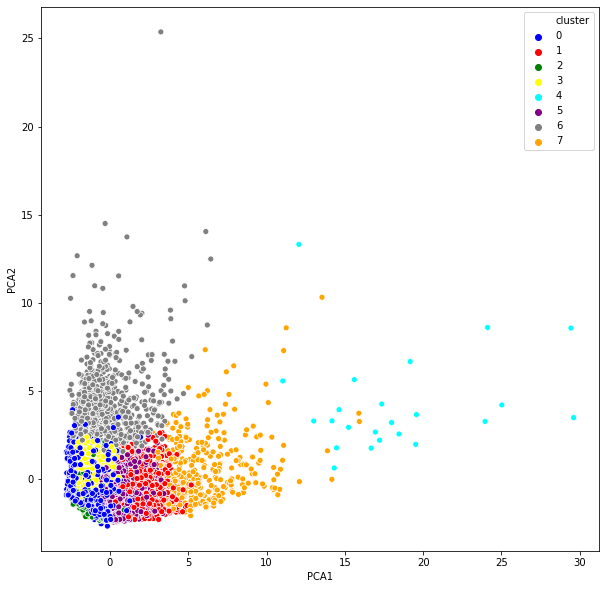

In [47]:
plt.figure(figsize= (10, 10))
ax = sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'cluster', data = pca_df2, palette= ['blue', 'red', 'green', 'yellow', 'cyan', 'purple', 'grey', 'orange'])

In [48]:
pca.explained_variance_ratio_

array([0.27297671, 0.2031378 ])

In [49]:
pca.explained_variance_ratio_.sum()

0.47611450955048834